In [6]:
import matplotlib.pyplot as plt

In [1]:
def c(vertiport,initial_soc,target_soc,time):
    if time < 2:
        return 0
    else:
        if (vertiport==1):
            if (initial_soc==0) & (target_soc==1):
                return 1
            else:
                return 0
        elif (vertiport==2):
            if (initial_soc==0) & (target_soc==1):
                return 2
            else:
                return 0
            
def u(origin, destination, state, time):
    if (state!=1) | (time<0):
        return 0
    else:
        if (origin == 1) & (destination == 2):
            return 2
        elif (origin == 2) & (destination == 1):
            return 1

In [2]:
def n(i,k,t, gamma=2):
    if i == 1:
        j = 2
    elif i == 2:
        j = 1

    if t < 2:
        return 0
    else:
        idle_from_previous_step = n(i,k,t-1)
        print("idle_from_previous_step:", idle_from_previous_step)

        incoming = u(origin=j, destination=i, state=k+1, time=t-2)
        print('incoming:', incoming)

        outgoing = u(origin=i, destination=j, state=k, time=t)
        print("outgoing:", outgoing)

        sum_charged = 0
        for initial_state in range(k-1,10):
            sum_charged += c(vertiport=i, initial_soc=initial_state, target_soc=k, time=t-gamma)
        print('sum_charged:', sum_charged)

        
        sum_to_charge = 0
        for final_state in range(k+1,10):
            sum_to_charge += c(vertiport=i, initial_soc=k, target_soc=final_state, time=t)
        print('sum_to_charge', sum_to_charge)

    return idle_from_previous_step+incoming-outgoing+sum_charged-sum_to_charge

In [3]:
n10 = []
n11 = []
n20 = []
n21 = []
for T in range(10):
    n10.append(n(1,0,T))
    n11.append(n(1,1,T))
    n20.append(n(2,0,T))
    n21.append(n(2,1,T))

idle_from_previous_step: 0
incoming: 1
outgoing: 0
sum_charged: 0
sum_to_charge 1
idle_from_previous_step: 0
incoming: 0
outgoing: 2
sum_charged: 0
sum_to_charge 0
idle_from_previous_step: 0
incoming: 2
outgoing: 0
sum_charged: 0
sum_to_charge 2
idle_from_previous_step: 0
incoming: 0
outgoing: 1
sum_charged: 0
sum_to_charge 0
idle_from_previous_step: 0
incoming: 1
outgoing: 0
sum_charged: 0
sum_to_charge 1
idle_from_previous_step: 0
incoming: 1
outgoing: 0
sum_charged: 0
sum_to_charge 1
idle_from_previous_step: 0
incoming: 0
outgoing: 2
sum_charged: 0
sum_to_charge 0
idle_from_previous_step: -2
incoming: 0
outgoing: 2
sum_charged: 0
sum_to_charge 0
idle_from_previous_step: 0
incoming: 2
outgoing: 0
sum_charged: 0
sum_to_charge 2
idle_from_previous_step: 0
incoming: 2
outgoing: 0
sum_charged: 0
sum_to_charge 2
idle_from_previous_step: 0
incoming: 0
outgoing: 1
sum_charged: 0
sum_to_charge 0
idle_from_previous_step: -1
incoming: 0
outgoing: 1
sum_charged: 0
sum_to_charge 0
idle_from_prev

Text(0, 0.5, '# of Aircrafts')

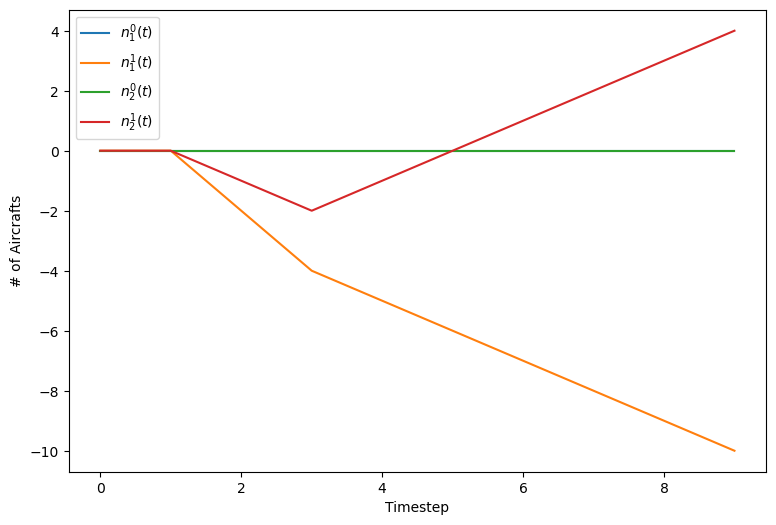

In [7]:
fig, ax = plt.subplots(figsize=(9,6))
plt.plot(n10, label='$n_{1}^{0}(t)$')
plt.plot(n11, label='$n_{1}^{1}(t)$')
plt.plot(n20, label='$n_{2}^{0}(t)$')
plt.plot(n21, label='$n_{2}^{1}(t)$')
plt.legend()
plt.xlabel('Timestep')
plt.ylabel('# of Aircrafts')